In [1]:
!pip install scipy

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
'''pearsonr and spearmanr are used to calculate coeffecient, correlation between the tables'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, spearmanr

In [3]:
bikesharing_data = pd.read_csv('C:/Users/aanand/Desktop/Python-Data/bike_sharing_daily.csv')

bikesharing_data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [4]:
bikesharing_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
bikesharing_data.shape

(731, 16)

In [6]:
'''Converting the column dteday in datetime format'''
bikesharing_data['dteday'] = pd.DatetimeIndex(bikesharing_data['dteday'])

In [7]:
'''First way to calcuate correlation coffeicient'''
np.corrcoef(bikesharing_data['temp'], bikesharing_data['cnt'])

array([[1.        , 0.62749401],
       [0.62749401, 1.        ]])

In [8]:
'''Second way to calculate correlation coffecient'''
bikesharing_data['temp'].corr(bikesharing_data['cnt'])

0.6274940090334918

In [10]:
'''Third way to calculate correlation coefficient'''
pearsonr(bikesharing_data['temp'], bikesharing_data['cnt'])

(0.6274940090334922, 2.8106223975901364e-81)

In [11]:
spearmanr(bikesharing_data['temp'], bikesharing_data['cnt'])

SpearmanrResult(correlation=0.6220344732276183, pvalue=1.674554642260452e-79)

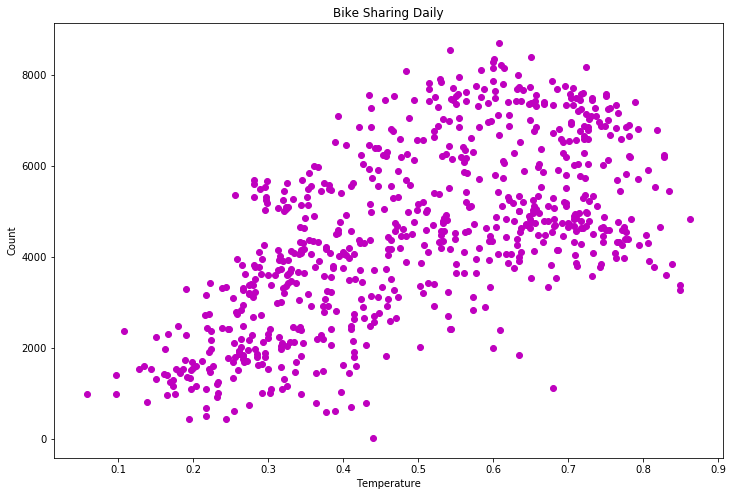

In [14]:
'''The correlation coeficient we calculate above for the column temp and count tells us that there is a linear relationship that exists between these 2 variables. Visualizing
it in the scatter plot'''
plt.figure(figsize = (12,8))

plt.scatter(bikesharing_data['temp'], 
           bikesharing_data['cnt'], color = 'm')

plt.title('Bike Sharing Daily')
plt.xlabel('Temperature')
plt.ylabel('Count')

plt.show()

In [15]:
'''Trying to find correlation cofficient for other variables with numpy'''
np.corrcoef(bikesharing_data['workingday'],
           bikesharing_data['registered'])

array([[1.        , 0.30390712],
       [0.30390712, 1.        ]])

In [16]:
'''Trying to find correlation cofficient for other variables with pandas. The relation is weak but positive as seeing above (probably because its less than 0.5..)'''
bikesharing_data['workingday'].corr(bikesharing_data['registered'])

0.30390711704591705

In [17]:
pearsonr(bikesharing_data['workingday'],
        bikesharing_data['registered'])

(0.30390711704591694, 4.3815710893710545e-17)

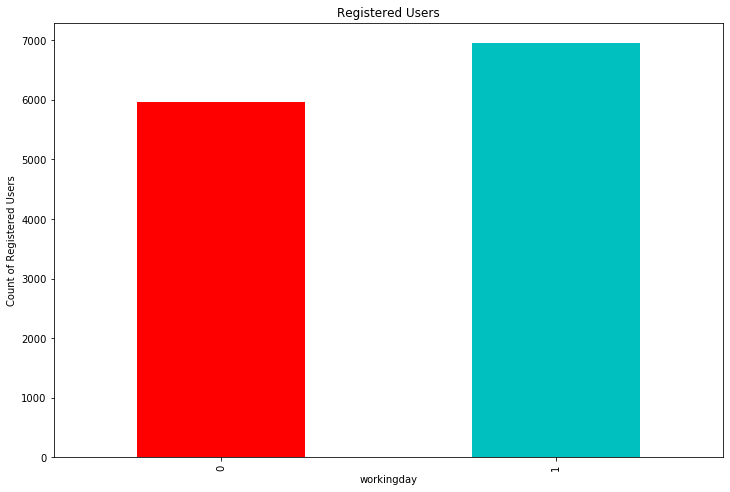

'Count on workingday is little higher'

In [29]:
'''Groupby.max function will group the maximum value of each group in the workingday column'''
ax = plt.subplot()
bikesharing_data.groupby('workingday').max()['registered'].plot(kind = 'bar',
                                                               figsize = (12,8),
                                                               ax = ax,
                                                               color = ['r', 'c'])

plt.title('Registered Users')
plt.ylabel('Count of Registered Users')

plt.show()

'''Count on workingday is little higher'''

In [20]:
bikesharing_data['workingday'].unique()

array([0, 1], dtype=int64)

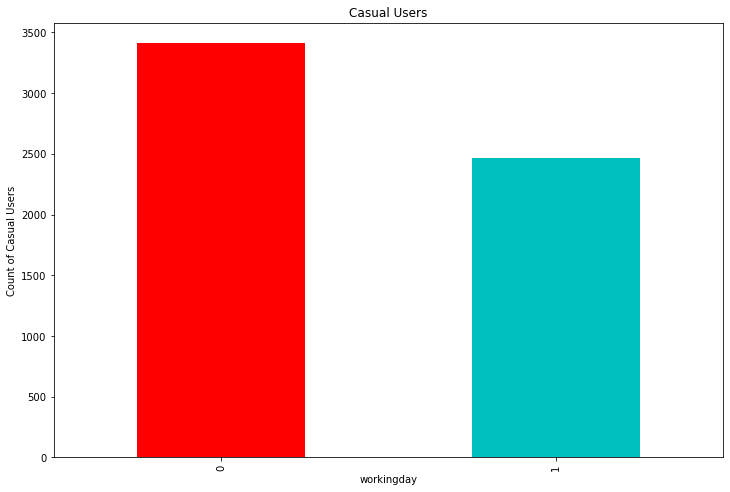

'Fewer casual Users on the working day'

In [31]:
ax = plt.subplot()
bikesharing_data.groupby('workingday').max()['casual'].plot(kind = 'bar',
                                                               figsize = (12,8),
                                                               ax = ax,
                                                               color = ['r', 'c'])

plt.title('Casual Users')
plt.ylabel('Count of Casual Users')

plt.show()

'''Fewer casual Users on the working day'''

In [40]:
bikesharing_data.groupby('workingday').max()['casual']

workingday
0    3410
1    2469
Name: casual, dtype: int64

In [41]:
'''let us see the correlation coeffecient between windspeed and count. The negative sign denotes that its negative '''

np.corrcoef(bikesharing_data['windspeed'], bikesharing_data['cnt'])

array([[ 1.      , -0.234545],
       [-0.234545,  1.      ]])

In [43]:
bikesharing_data['windspeed'].corr(bikesharing_data['cnt'])

-0.23454499742167004

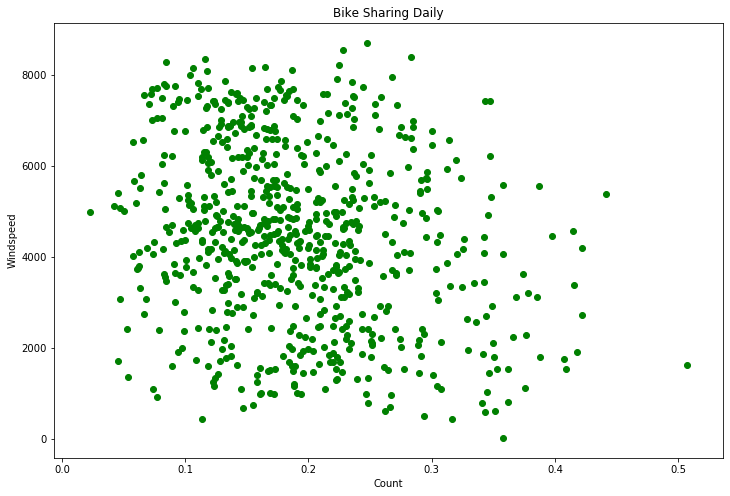

In [45]:
plt.figure(figsize = (12,8))

plt.scatter(bikesharing_data['windspeed'], 
           bikesharing_data['cnt'], color = 'g')

plt.title('Bike Sharing Daily')
plt.xlabel('Count')
plt.ylabel('Windspeed')

plt.show()

In [46]:
'''Seeing the correlation coefficient for all the variables in the dataframe'''

bikesharing_data.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


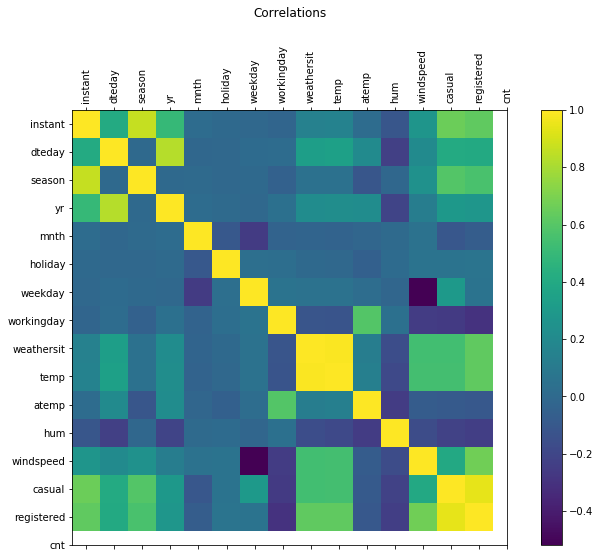

In [47]:
'''Heatmap of correlation between the variables. The lighter yellow color shows the positive relation whereas the darker color shows negative. See the bar beside the heatmap'''

plt.figure(figsize=(12,8))

plt.matshow(bikesharing_data.corr(),
           fignum = False,
           aspect = 'equal')

columns = len(bikesharing_data.columns)

plt.xticks(range(columns), bikesharing_data.columns)
plt.yticks(range(columns), bikesharing_data.columns)

plt.colorbar()
plt.xticks(rotation = 90)
plt.title('Correlations', y = 1.2)

plt.show()

In [49]:
'''Another great library to visualize the correlation that exists in the data is through yellowbrick'''

!pip install yellowbrick

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [50]:
'''Setting up target features against which I want all the correlation coefficient to be calculated. Calculation correlations vs the count target for all columns except the 4
mentioned below'''
target = bikesharing_data['cnt']

features = bikesharing_data.drop(['casual','registered','cnt','dteday'], axis = 1)

In [51]:
features

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133
727,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471
728,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383
729,730,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754


In [52]:
'''Creating the list of features list'''
from yellowbrick.target import FeatureCorrelation

feature_names = list(features.columns)
feature_names

['instant',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed']

c:\users\aanand\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


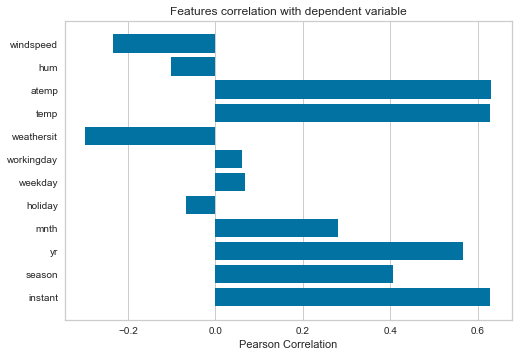

In [53]:
'''Positive features correlation with cnt has bars towards the right and -ve feature correlation with the column cnt has bars towards left'''
visualizer = FeatureCorrelation(labels = feature_names)
visualizer.fit(features, target)

visualizer.poof()